In [1]:
import grid2op

print(
    "The current local directory where the environment are downloaded is \n{}"
    "".format(grid2op.get_current_local_dir())
)
print(
    "The environments available without necessary download are: \n{}"
    "".format(grid2op.list_available_local_env())
)
print(
    "I can download these environments from the internet: \n{}"
    "".format(grid2op.list_available_remote_env())
)

The current local directory where the environment are downloaded is 
C:\Users\Balco\data_grid2op
The environments available without necessary download are: 
['l2rpn_2019', 'l2rpn_case14_sandbox']
I can download these environments from the internet: 
['l2rpn_2019', 'l2rpn_case14_sandbox', 'l2rpn_icaps_2021_large', 'l2rpn_icaps_2021_small', 'l2rpn_idf_2023', 'l2rpn_neurips_2020_track1_large', 'l2rpn_neurips_2020_track1_small', 'l2rpn_neurips_2020_track2_large', 'l2rpn_neurips_2020_track2_small', 'l2rpn_wcci_2020', 'l2rpn_wcci_2022', 'rte_case14_realistic', 'rte_case14_redisp', 'wcci_test']


In [2]:
# The automatic download isn't working correctly
# Uncomment these lines to download the environment through your web browser

# import grid2op.MakeEnv
# import grid2op.MakeEnv.Make

# env_name = "l2rpn_case14_sandbox"  # for example, other environments might be usable
# grid2op.MakeEnv.Make._fecth_environments(env_name)

In [3]:
# Uncomment these lines to extract the environment file
# Modify the `output_path` accordingly

# import tarfile
# import os

# output_path = r"C:\Users\Balco\data_grid2op\l2rpn_case14_sandbox.tar.bz2"
# path_data = grid2op.MakeEnv.PathUtils.DEFAULT_PATH_DATA

# tar = tarfile.open(output_path, "r:bz2")
# print('Extract the tar archive in "{}"'.format(os.path.abspath(path_data)))
# tar.extractall(path_data)
# tar.close()

In [2]:
# create an environment
env_name = "l2rpn_case14_sandbox"  # for example, other environments might be usable
env = grid2op.make(env_name)

In [10]:
# create an agent
from grid2op.Agent import RandomAgent, TopologyGreedy

# my_agent = RandomAgent(env.action_space)
my_agent = TopologyGreedy(env.action_space)

# proceed as you would any open ai gym loop
nb_episode = 1
nb_steps = 30
step = 0
for ep in range(nb_episode):
    print(f"***Episode {ep}")
    # you perform in this case 10 different episodes
    obs = env.reset()
    # env.render()
    reward = env.reward_range[0]
    done = False
    while not done and step <= nb_steps:
        print(f"  Step: {step}, Episode: {ep}")
        # here you loop on the time steps: at each step your agent receive an observation
        # takes an action
        # and the environment computes the next observation that will be used at the next step.
        act = my_agent.act(obs, reward, done)
        print(f"  Action: {act}")
        obs, reward, done, info = env.step(act)
        print(f"  Obs: {obs}")
        print(f"  Reward: {reward}")
        print(f"  Done: {done}")
        # print(f"  Info: {info}")
        # env.render()
        step += 1
        print()

***Episode 0
  Step: 0, Episode: 0
  Action: This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 1 to line (origin) id 10 [on substation 8]
	 	 - Assign bus 1 to line (origin) id 11 [on substation 8]
	 	 - Assign bus 1 to line (extremity) id 16 [on substation 8]
	 	 - Assign bus 2 to line (origin) id 19 [on substation 8]
	 	 - Assign bus 2 to load id 5 [on substation 8]
  Obs: <grid2op.Space.GridObjects.CompleteObservation_l2rpn_case14_sandbox object at 0x0000025D2FAEE790>
  Reward: 64.72216796875
  Done: False

  Step: 1, Episode: 0
  Action: This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	

In [11]:
obs.shapes()

array([ 1,  1,  1,  1,  1,  1,  6,  6,  6, 11, 11, 11, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 57, 20, 14, 20, 20,  6,  6,  0,  0,  0,  6,
        6,  6,  6,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  6,
        0,  0,  0,  0,  0,  0,  0])

In [12]:
obs.to_dict()

{'timestep_overflow': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'line_status': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]),
 'topo_vect': array([1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'loads': {'p': array([20.5, 82. , 43.1,  6.4, 11. , 26.5,  8.3,  3.1,  5. , 11.3, 14.3],
        dtype=float32),
  'q': array([14.6, 57.4, 29.3,  4.5,  7.8, 18.2,  5.8,  2.2,  3.4,  8. ,  9.9],
        dtype=float32),
  'v': array([142.1     , 142.1     , 139.29999 , 140.1125  ,  22.      ,
          20.620365,  21.64294 ,  21.74553 ,  21.654408,  21.55682 ,
          21.1772  ], dtype=float32)},
 'prods': {'p': array([67.7    , 66.6    , 32.7    ,  0.     ,  0.     , 67.38353],
        dtype=float32),
  'q': ar

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

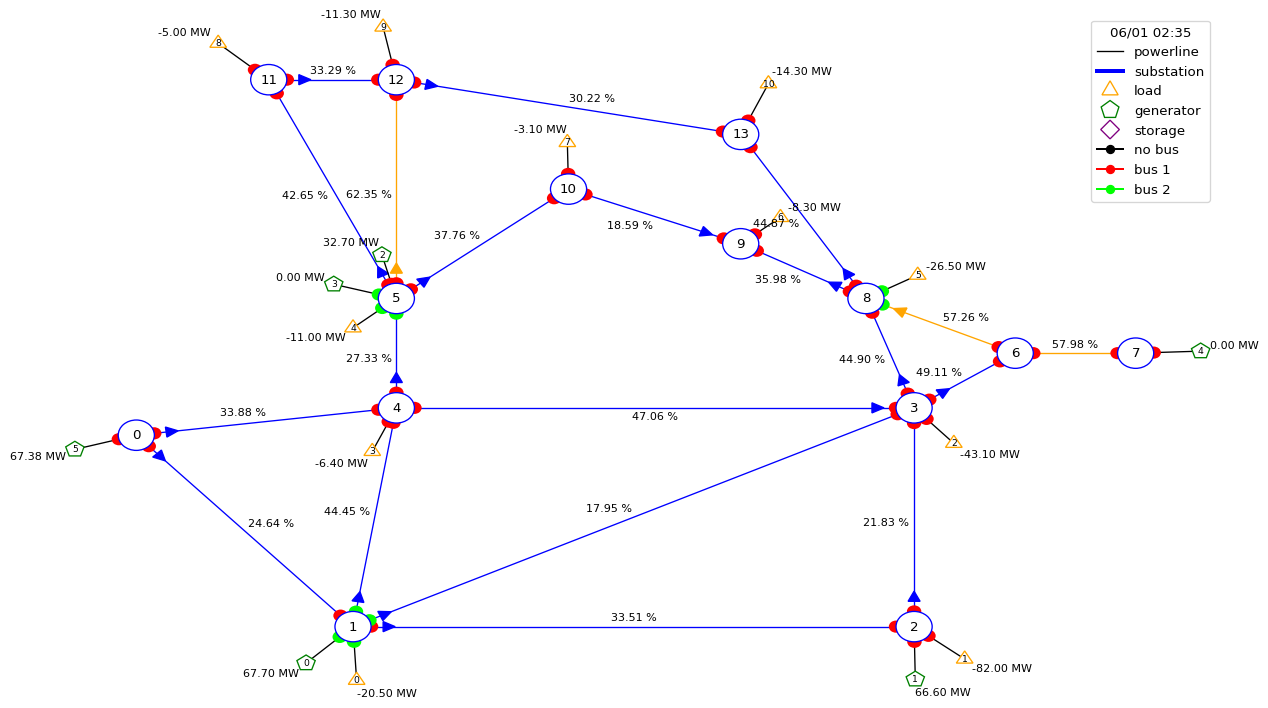

In [13]:
env.render()

In [9]:
obs = env.reset()
obs.shapes()

array([ 1,  1,  1,  1,  1,  1,  6,  6,  6, 11, 11, 11, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 57, 20, 14, 20, 20,  6,  6,  0,  0,  0,  6,
        6,  6,  6,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  6,
        0,  0,  0,  0,  0,  0,  0])

In [10]:
obs.to_dict()

{'timestep_overflow': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'line_status': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]),
 'topo_vect': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'loads': {'p': array([21.7, 85.6, 43.6,  6.9, 11.6, 27.9,  8.6,  3.4,  5.3, 12.3, 14.6],
        dtype=float32),
  'q': array([15.2, 60.4, 30.9,  4.8,  8.1, 19.5,  6.1,  2.3,  3.8,  8.9, 10.2],
        dtype=float32),
  'v': array([142.1     , 142.1     , 139.20154 , 139.94931 ,  22.      ,
          21.087425,  21.088371,  21.452332,  21.578804,  21.423275,
          20.72405 ], dtype=float32)},
 'prods': {'p': array([70.6     , 68.7     , 37.      ,  0.      ,  0.      , 68.556694],
        dtype=float32),
  '

In [11]:
obs.gen_cost_per_MW

array([40., 70.,  0.,  0.,  0., 70.], dtype=float32)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

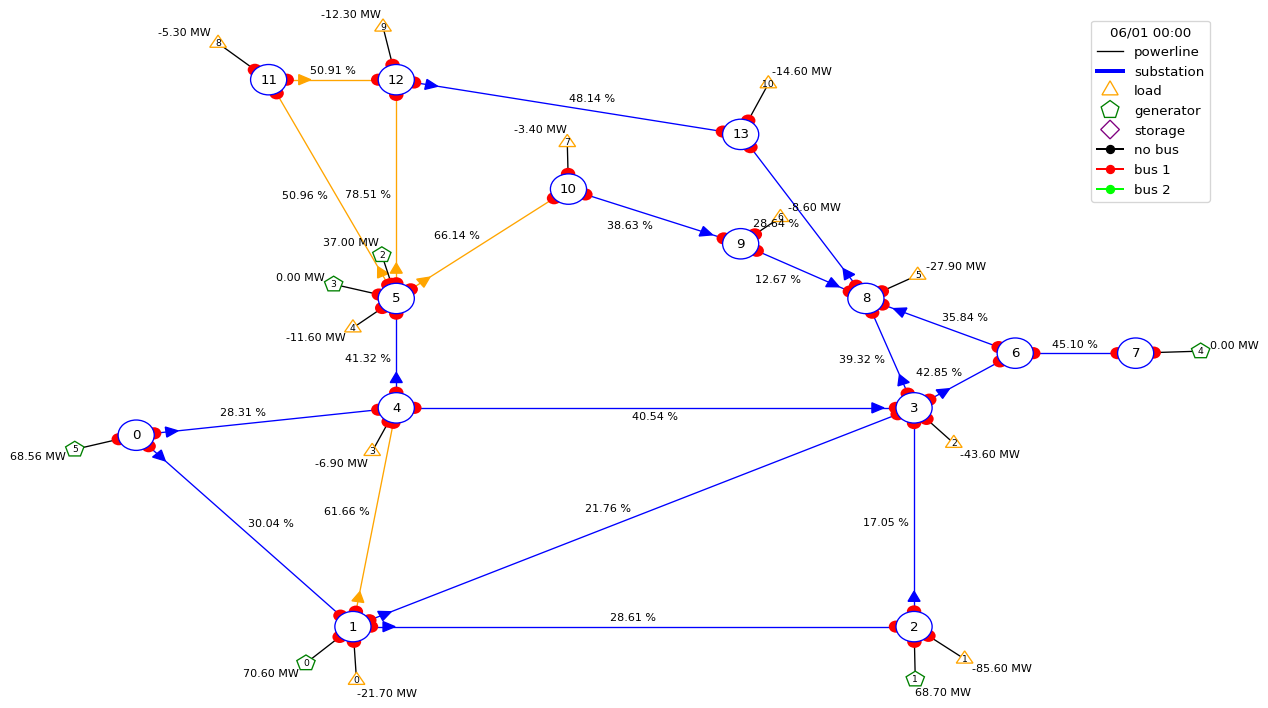

In [12]:
env.render()